# How to Access Different Form Factors and Rates

In this notebook we give an example for different form factor parameterizations and how to use them for $B$ to $D^{**}$ decays.
This will be a basic instructions and only concern itself with central values. 

In [1]:
# from effort2.rates.BtoDStSt import BtoD0St

import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
import pdg
import b2plot as bp
import effort2.rates.BtoDStSt

Welcome to JupyROOT 6.24/06
For optimal usage set `plt.style.use('belle2')`


## Setting Up 

* We will require the masses of the contributing $B$ and $D^{**}$ mesons. We work with zero lepton masses, which is the default for effort. Non-zero lepton masses will be explored in a different notebook.

* We will look at the BLR form factor parametrisation. Please note that the chosen values for the form factors might be outdated, and only serve for an explanatory purpose.

In [2]:
m_Bzero = pdg.get(511).Mass()
m_Bplus = pdg.get(521).Mass()
m_tau = pdg.get(15).Mass()

## Plotting

In [3]:
def add_watermark(
    ax,
    t: str = None,
    logo: str = "Belle II",
    px: float = 0.033,
    py: float = 1.022, #0.915,
    fontsize: int = 10,
    alpha_logo=1,
    shift: float = 0.15,
    bstyle: str = "normal",
    *args,
    **kwargs,
):
    ax.text(px, py, logo, ha="left", transform=ax.transAxes, fontsize=fontsize, style=bstyle, alpha=alpha_logo, weight="bold", *args, **kwargs,)
    ax.text(px + shift, py, t, ha="left", transform=ax.transAxes, fontsize=fontsize, alpha=alpha_logo, *args, **kwargs,)

In [4]:
dict_d = {
    'D0*': {
        'pdg': 10411,
        'rate': effort2.rates.BtoDStSt.BtoD0St,
        'str': r"$B^0 \to D^*_0 \ell \bar{\nu}_\ell$",
    },
    'D1*': {
        'pdg': 20413,
        'rate': effort2.rates.BtoDStSt.BtoD1St,
        'str': r"$B^0 \to D^*_1 \ell \bar{\nu}_\ell$",
    },
    'D1': {
        'pdg': 10413,
        'rate': effort2.rates.BtoDStSt.BtoD1,
        'str': r"$B^0 \to D_1 \ell \bar{\nu}_\ell$",
    },
    'D2*': {
        'pdg': 415,
        'rate': effort2.rates.BtoDStSt.BtoD2St,
        'str': r"$B^0 \to D^*_2 \ell \bar{\nu}_\ell$",
    },
}

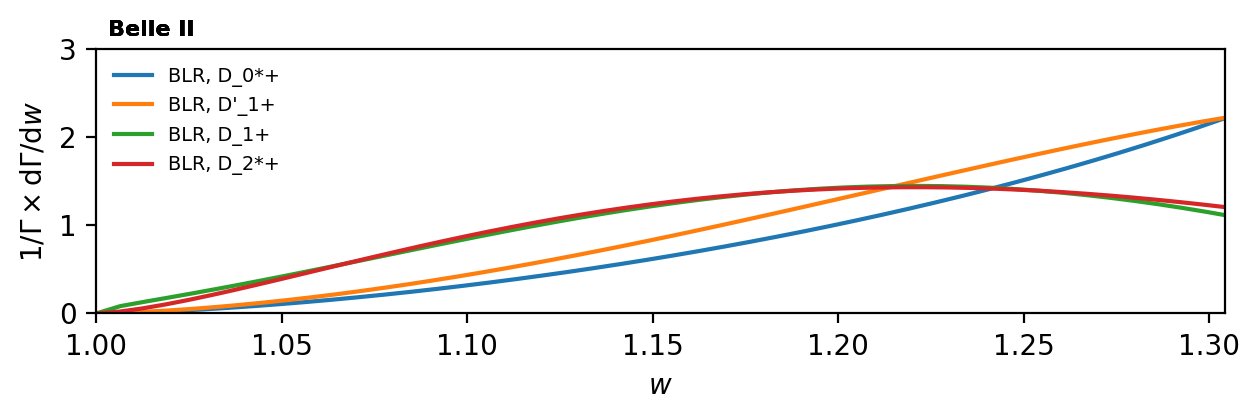

In [5]:
# B0, massless lepton
fig, ax = plt.subplots(dpi=200, figsize=(6.4, 2.2), nrows=1, ncols=1, sharex=False, sharey=False)
for key in dict_d.keys():
    m_D = pdg.get(dict_d[key]['pdg']).Mass()
    rate = dict_d[key]['rate'](
        Vcb=40e-3,
        m_D=m_D,
        m_B=m_Bzero,
        m_L=0,
    )
    w_range = np.linspace(*rate.kinematics.w_range_numerical_stable)

    total_rate = rate.Gamma()
    w_rate     = [rate.dGamma_dw(w) / total_rate * (max(w_range) - min(w_range)) for w in w_range]

    ax.plot(w_range, unp.nominal_values(w_rate), label=f"BLR, {pdg.get(dict_d[key]['pdg']).GetName()}", ls="solid")

    ax.set_xlim(1, max(w_range))

    ax.set_ylim(0, 3)

    ax.set_xlabel(r"$w$")

    ax.set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}w$")

    ax.legend(loc="upper left", frameon=False, fontsize="x-small", ncol=1)

    add_watermark(ax, px=0.01, py=1.05, fontsize=8)

    plt.tight_layout()

plt.show()
plt.close()

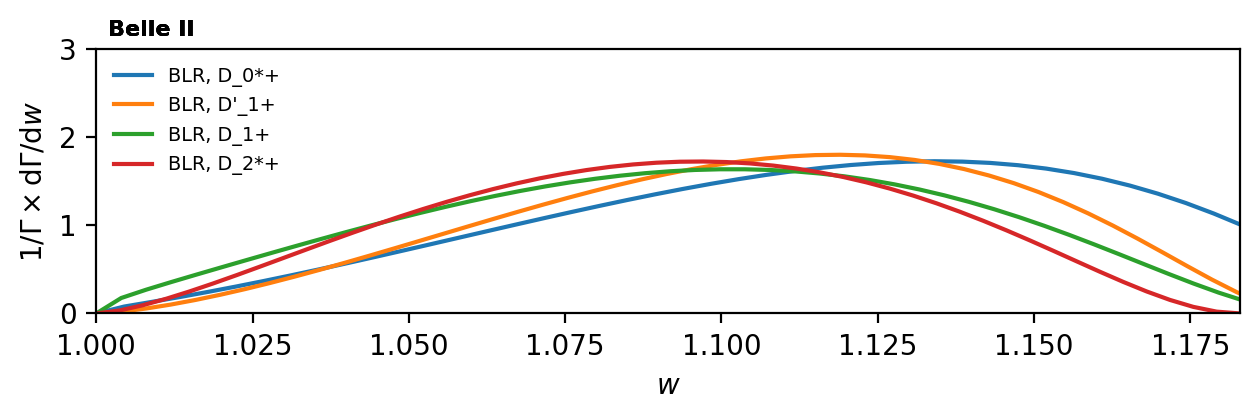

In [6]:
# B0, tau lepton
fig, ax = plt.subplots(dpi=200, figsize=(6.4, 2.2), nrows=1, ncols=1, sharex=False, sharey=False)
for key in dict_d.keys():
    m_D = pdg.get(dict_d[key]['pdg']).Mass()
    rate = dict_d[key]['rate'](
        Vcb=40e-3,
        m_D=m_D,
        m_B=m_Bzero,
        m_L=m_tau,
    )
    w_range = np.linspace(*rate.kinematics.w_range_numerical_stable)

    total_rate = rate.Gamma()
    w_rate     = [rate.dGamma_dw(w) / total_rate * (max(w_range) - min(w_range)) for w in w_range]

    ax.plot(w_range, unp.nominal_values(w_rate), label=f"BLR, {pdg.get(dict_d[key]['pdg']).GetName()}", ls="solid")

    ax.set_xlim(1, max(w_range))

    ax.set_ylim(0, 3)

    ax.set_xlabel(r"$w$")

    ax.set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}w$")

    ax.legend(loc="upper left", frameon=False, fontsize="x-small", ncol=1)

    add_watermark(ax, px=0.01, py=1.05, fontsize=8)

    plt.tight_layout()

plt.show()
plt.close()